In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- mnist dataset
    - black and white(흑백)
    - RGB : (0, 0, 255)

### 손글씨 분류 모델 만들기

In [2]:
# 1. 데이터 로드

In [3]:
from sklearn import datasets

In [4]:
mnist = datasets.load_digits() # 8 * 8 이미지, 1797개
# 이미지 분석에서 사용되는 대표적인 벤치마킹 데이터셋

In [35]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
# 2. 데이터 전처리

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
print(len(mnist["data"]))

1797


In [9]:
data = mnist["data"][0]
print(data)

# 원래의 행렬 데이터로 변환 8X8
img = data.reshape(8, 8)
img

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

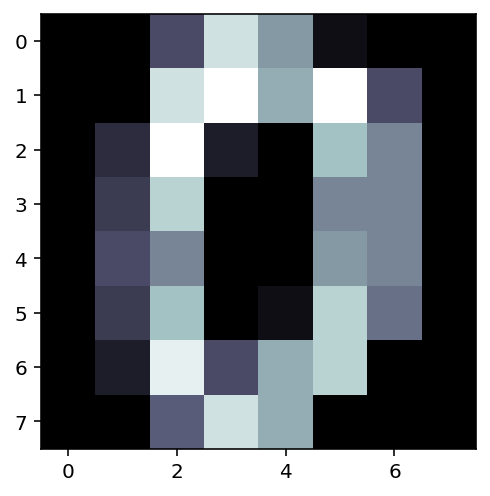

In [10]:
# 이미지 출력
plt.imshow(img, cmap=plt.cm.bone)
plt.show()

In [11]:
# mnist.data[1000:1002], mnist.target[1000:1002]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_x, test_x, train_y, test_y = train_test_split(
    mnist.data, mnist.target, test_size=0.3, random_state=0)

In [14]:
# 3. 모델 학습 : svm : linear, rbf

In [15]:
from sklearn.svm import SVC

In [16]:
linear_model = SVC( kernel="linear").fit(train_x, train_y)

In [17]:
rbf_model = SVC(kernel="rbf", C=10).fit(train_x, train_y)

In [18]:
# 4. 모델 평가

In [19]:
linear_score = linear_model.score(test_x, test_y)
rbf_score = rbf_model.score(test_x, test_y)
linear_score, rbf_score
# rbf 모델의 성능이 더 좋은 것을 확인

(0.9740740740740741, 0.9925925925925926)

In [38]:
# rbf_model -> gamma, C -> 조합을 만들어서 계산해보자

# gamma = 0.1 - 1.0 
# c = 1 ~ 10
# kernel = linear, poly, rbf
# poly - degree = 3 - 10

# Grid Search
kernel_list = ['poly', 'rbf']
degree_list = np.arange(3,11,1)
gamma_list = np.arange(0.001, 0.011, 0.001)
C_list = np.arange(1,11,1)

result_dict = {}
ct = 0

for kernel in kernel_list :
    if kernel == 'poly' : # poly
        for degree in degree_list :
            model = SVC(degree = degree, kernel = 'poly')
            model.fit(train_x, train_y)
            score = model.score(test_x, test_y)
            result_dict[ct] = {'degree' : degree, 'score' : score }
            print(result_dict[ct])
            
    else : # rbf
        for gamma in gamma_list :
            for C in C_list :
                model = SVC(kernel ='rbf', gamma = gamma, C = C)
                model.fit(train_x, train_y)
                score = model.score(test_x, test_y)
                result_dict[ct] = {'gamma' : gamma, 'C' : C , 'score' : score}
                print(result_dict[ct])


{'degree': 3, 'score': 0.9888888888888889}
{'degree': 4, 'score': 0.9833333333333333}
{'degree': 5, 'score': 0.9777777777777777}
{'degree': 6, 'score': 0.9796296296296296}
{'degree': 7, 'score': 0.9703703703703703}
{'degree': 8, 'score': 0.9666666666666667}
{'degree': 9, 'score': 0.9629629629629629}
{'degree': 10, 'score': 0.9592592592592593}
{'gamma': 0.001, 'C': 1, 'score': 0.9925925925925926}
{'gamma': 0.001, 'C': 2, 'score': 0.9907407407407407}
{'gamma': 0.001, 'C': 3, 'score': 0.9907407407407407}
{'gamma': 0.001, 'C': 4, 'score': 0.9907407407407407}
{'gamma': 0.001, 'C': 5, 'score': 0.9907407407407407}
{'gamma': 0.001, 'C': 6, 'score': 0.9907407407407407}
{'gamma': 0.001, 'C': 7, 'score': 0.9907407407407407}
{'gamma': 0.001, 'C': 8, 'score': 0.9907407407407407}
{'gamma': 0.001, 'C': 9, 'score': 0.9907407407407407}
{'gamma': 0.001, 'C': 10, 'score': 0.9907407407407407}
{'gamma': 0.002, 'C': 1, 'score': 0.9907407407407407}
{'gamma': 0.002, 'C': 2, 'score': 0.9907407407407407}
{'gamm

In [23]:
# GridSearchCV 모듈 사용해서 간단하게 GridSearch 가능
from sklearn.model_selection  import GridSearchCV

In [42]:
# kernel - poly degree가 3인 경우의 성능이 가장 좋음
models = SVC(kernel ='poly', degree = 3)
models.fit(train_x, train_y)
models.score(test_x, test_y)

0.9888888888888889

In [41]:
# kernel - rbf gamma가 0.01, C가 1 인 경우의 성능이 가장 좋음
models2 = SVC(kernel ='rbf', gamma = 0.001, C=1)
models2.fit(train_x, train_y)
models2.score(test_x, test_y)

0.9925925925925926

In [31]:
# c : 10 : 0.99259 > 과적합확인
# c : 1 : 0.99074
# c : 0.1 : 0.9481

In [32]:
# 5. 모델 사용

In [43]:
# import PIL.Image as pil
from PIL import Image

im = Image.open('*.jpeg') 
im.size 
# 모델이 예측할 수 있는 사이즈로 변경시켜줘야함

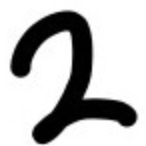

In [44]:
import PIL.Image as pil

sample_data = pil.open("./imgs/data_1.png")
sample_data

In [ ]:
# 이미지 사이즈를 8 * 8로 축소

In [45]:
# 모델을 8x8로 이미지를 학습해줬기 때문에 8x8사이즈로 변환해줘야함
data1 = sample_data.resize((8, 8))
data1

In [ ]:
# 흑백 이미지로 변경

In [46]:
np.array(data1).shape

(8, 8, 4)

In [47]:
data2 = np.array(data1).mean(axis=2)
data2.shape

(8, 8)

In [ ]:
# 흑백 전환 : 양각 > 음각

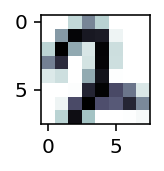

In [48]:
plt.figure(figsize=(2, 1))
plt.imshow(data2, cmap=plt.cm.bone)
plt.show()

In [49]:
data3 = np.ones(data2.shape) * 255 - data2
data3

array([[  0.  ,   0.  ,  30.75,  81.75,  35.25,   0.  ,   0.  ,   0.  ],
       [  0.  ,  70.5 , 171.  , 156.  , 153.75,   8.25,   0.  ,   0.  ],
       [ 33.75, 175.5 ,  61.5 ,  19.5 , 171.75,  25.5 ,   0.  ,   0.  ],
       [ 84.75, 141.  ,   0.  ,  22.5 , 171.  ,  24.75,   0.  ,   0.  ],
       [ 17.25,  24.75,   0.  ,  60.75, 159.75,   0.75,   0.  ,   0.  ],
       [  0.  ,   0.  ,   1.5 , 146.25, 172.5 , 117.75,  90.75,  18.75],
       [  0.  ,   8.25, 117.  , 175.5 , 113.25, 106.5 , 145.5 ,  79.5 ],
       [  0.  ,  34.5 , 164.25,  46.5 ,   0.  ,   0.  ,   0.75,   4.5 ]])

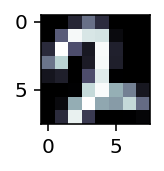

In [50]:
plt.figure(figsize=(2, 1))
plt.imshow(data3, cmap=plt.cm.bone)
plt.show()

In [51]:
# 색상범위 256 > 16

In [52]:
data4 = np.round(data3 / 16)
data4

array([[ 0.,  0.,  2.,  5.,  2.,  0.,  0.,  0.],
       [ 0.,  4., 11., 10., 10.,  1.,  0.,  0.],
       [ 2., 11.,  4.,  1., 11.,  2.,  0.,  0.],
       [ 5.,  9.,  0.,  1., 11.,  2.,  0.,  0.],
       [ 1.,  2.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  7.,  6.,  1.],
       [ 0.,  1.,  7., 11.,  7.,  7.,  9.,  5.],
       [ 0.,  2., 10.,  3.,  0.,  0.,  0.,  0.]])

In [53]:
rbf_model.predict(data4.reshape(1, -1))

array([2])